In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np

drive.mount('/content/drive')
dffile = '/content/drive/MyDrive/vgames2.csv'

Mounted at /content/drive


In [3]:
df = pd.read_csv(dffile, index_col = 0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
# 전처리
# 1. 판매량 float형으로 변경
df_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df_sales2 = pd.DataFrame(index = df_sales.index -1, columns = df_sales.columns)
# list별로 처리해주기 위해 임시로 빈 리스트 선언
temp = []
for i in range(len(df_sales)):
  temp = df_sales.iloc[i]
  for j in range(len(temp)):
    if 'K' in temp[j]:
      temp[j] = temp[j].replace('K', '')
      temp[j] = float(temp[j]) * 0.001
    elif 'M' in temp[j]:
      temp[j] = temp[j].replace('M', '')
  df_sales2.loc[i] = temp

df_sales2 = df_sales2.astype(float)
df_sales2

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0.00,0.00,0.00
1,0.17,0.00,0.00,0.01
2,0.00,0.00,0.02,0.00
3,0.04,0.00,0.00,0.00
4,0.12,0.09,0.00,0.04
...,...,...,...,...
16593,0.15,0.04,0.00,0.01
16594,0.01,0.00,0.00,0.00
16595,0.44,0.19,0.03,0.13
16596,0.05,0.05,0.25,0.03


In [5]:
# 2. 총 판매량 추가
df_sales3 = df_sales2.copy()
df_sales3['Total_Sales'] = df_sales2.sum(axis = 1)
df_sales3.index = df_sales3.index + 1
df_sales3

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,0.04,0.00,0.00,0.00,0.04
2,0.17,0.00,0.00,0.01,0.18
3,0.00,0.00,0.02,0.00,0.02
4,0.04,0.00,0.00,0.00,0.04
5,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...
16594,0.15,0.04,0.00,0.01,0.20
16595,0.01,0.00,0.00,0.00,0.01
16596,0.44,0.19,0.03,0.13,0.79
16597,0.05,0.05,0.25,0.03,0.38


In [6]:
df[df.Year.isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
359,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
431,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16241,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16276,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16279,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


In [7]:
# 지역에 따라 선호하는 게임 장르가 다를까?
# 필요한 feafure: Genre, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Total_Sales
# 사용할 분석: 
# 그 지역에 인기가 많은 장르라면 판매비율이 높을 것으로 예상.

df_Genre = pd.concat([df['Genre'], df_sales2], axis = 1)
df_Genre = df_Genre.dropna(axis = 0).reset_index(drop = True)
df_Genre.index = df_Genre.index + 1
Genres = []

for i in df_Genre['Genre']:
  if i not in Genres:
    Genres.append(i)
Genres.remove('Misc')
# pie차트로 나타낼 장르 선호도
df_Genre_sum = pd.DataFrame(columns = df_sales2.columns,
                      index = Genres)
for i in Genres:
  temp = df_Genre[df_Genre['Genre'] == i].reset_index(drop = True)
  df_Genre_sum.loc[i] = temp.sum(axis = 0)
#df_Genre_sum = df_Genre_sum.drop(['Misc'], axis = 0)
df_Genre_sum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Action,822.35,459.05,249.47,153.66
Adventure,310.01,172.85,78.81,55.86
Platform,209.82,118.38,83.28,31.37
Sports,637.93,339.81,184.93,111.81
Simulation,187.59,108.63,60.34,34.56
Racing,374.63,210.68,104.44,66.92
Role-Playing,390.86,226.51,108.61,82.42
Puzzle,198.53,115.81,68.31,37.16
Strategy,199.62,106.75,55.4,29.37
Fighting,239.67,129.9,62.16,40.2


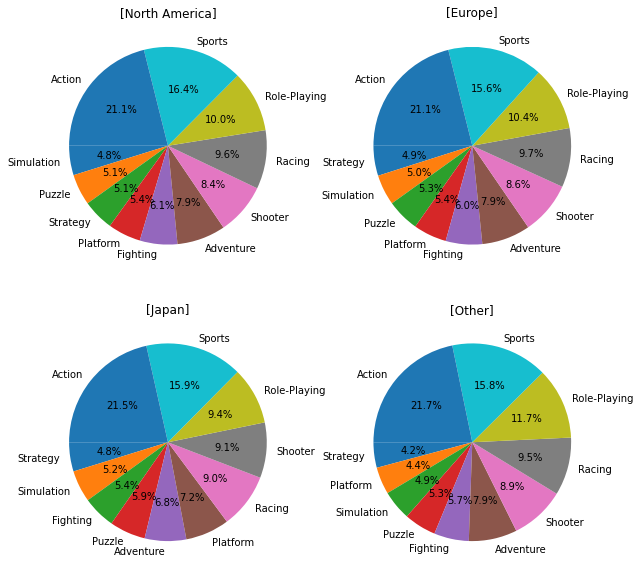

In [8]:
plt.figure(figsize = (10, 10))

plt.subplot(221)
plt.title('[North America]')
df_Genre_sum = df_Genre_sum.sort_values(by = 'NA_Sales')
plt.pie(df_Genre_sum['NA_Sales'], labels = df_Genre_sum.index, autopct='%.1f%%', startangle= 180)

plt.subplot(222)
plt.title('[Europe]')
df_Genre_sum = df_Genre_sum.sort_values(by = 'EU_Sales')
plt.pie(df_Genre_sum['EU_Sales'], labels = df_Genre_sum.index, autopct='%.1f%%', startangle= 180)

plt.subplot(223)
plt.title('[Japan]')
df_Genre_sum = df_Genre_sum.sort_values(by = 'JP_Sales')
plt.pie(df_Genre_sum['JP_Sales'], labels = df_Genre_sum.index, autopct='%.1f%%', startangle= 180)

plt.subplot(224)
plt.title('[Other]')
df_Genre_sum = df_Genre_sum.sort_values(by = 'Other_Sales')
plt.pie(df_Genre_sum['Other_Sales'], labels = df_Genre_sum.index, autopct='%.1f%%', startangle= 180)
plt.show()

In [9]:
from scipy.stats import chi2_contingency

# 카이제곱 검정을 할 장르 선호도
df_Genre_sum
print(chi2_contingency(df_Genre_sum, correction = False))
# pvalue가 0.9(>0.05)이므로 지역에 따라 같은 분포를 가지고 있음을 알 수 있다.

(16.74671861282152, 0.9754896063336588, 30, array([[192.02673426, 107.15578192,  57.16695251,  34.79053132],
       [217.41330282, 121.32213024,  64.72461246,  39.38995448],
       [192.01691543, 107.15030277,  57.16402941,  34.78875239],
       [206.10201797, 115.01014677,  61.35720799,  37.34062727],
       [231.68987242, 129.28881771,  68.97479137,  41.9765185 ],
       [303.17090864, 169.1770466 ,  90.25491686,  54.92712789],
       [336.11306201, 187.55960264, 100.06189778,  60.89543758],
       [371.48046482, 207.29550929, 110.59088294,  67.30314295],
       [396.87685221, 221.46733677, 118.15146599,  71.90434503],
       [625.69471871, 349.15350243, 186.27125232, 113.36052655],
       [827.00515073, 461.48982286, 246.20199036, 149.83303605]]))


In [10]:
# 연도별 게임의 트렌드가 있을까?
# 필요한 feature: Year, Genre, Publisher, Total_Sales
df_Trend = pd.concat([df[['Year', 'Platform', 'Publisher', 'Genre']], df_sales3['Total_Sales']], axis = 1)
df_Trend = df_Trend[df_Trend['Year'].notnull()].reset_index(drop = True)

In [11]:
def cleaning(x):
  if x < 50:
    x += 2000
  elif x < 100:
    x += 1900
  return x

df_Trend['Year'] = df_Trend['Year'].apply(cleaning)

df_Trend

,Year,Platform,Publisher,Genre,Total_Sales
0,2008.0,DS,Destineer,Action,0.04
1,2009.0,Wii,Namco Bandai Games,Action,0.18
2,2010.0,PSP,Alchemist,Adventure,0.02
3,2010.0,DS,Zoo Games,Misc,0.04
4,2010.0,PS3,D3Publisher,Platform,0.25
...,...,...,...,...,...
16322,2006.0,GC,Vivendi Games,Platform,0.20
16323,2005.0,PSP,Rising Star Games,Action,0.01
16324,2015.0,PS3,Take-Two Interactive,Sports,0.79
16325,2013.0,PSV,Tecmo Koei,Action,0.38


Genre,Action,Adventure,Fighting,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,
1980.0,1,0,1,0,0,0,0,2,0,0,0
1981.0,25,0,0,3,2,1,0,10,1,4,0
1982.0,18,0,0,5,3,2,0,5,0,2,0
1983.0,7,1,0,5,1,0,0,1,0,1,0
1984.0,1,0,0,1,3,3,0,3,0,2,0
1985.0,2,0,1,4,4,0,0,1,1,1,0
1986.0,6,0,0,6,0,1,1,4,0,3,0
1987.0,2,1,2,2,0,0,3,2,0,4,0
1988.0,2,0,0,4,1,1,3,1,1,2,0


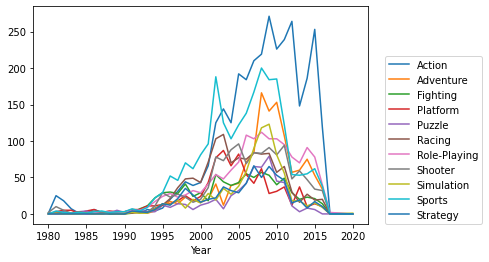

In [12]:
# 연도별 Genre에 따른 트렌드
df_Trend = df_Trend[df_Trend['Genre'].notnull()].reset_index(drop = True)

df_Trend2 = pd.crosstab(df_Trend.Year, df_Trend.Genre).drop(['Misc'], axis=1)
(df_Trend2.plot().legend(loc=(1.05, 0)));
df_Trend2

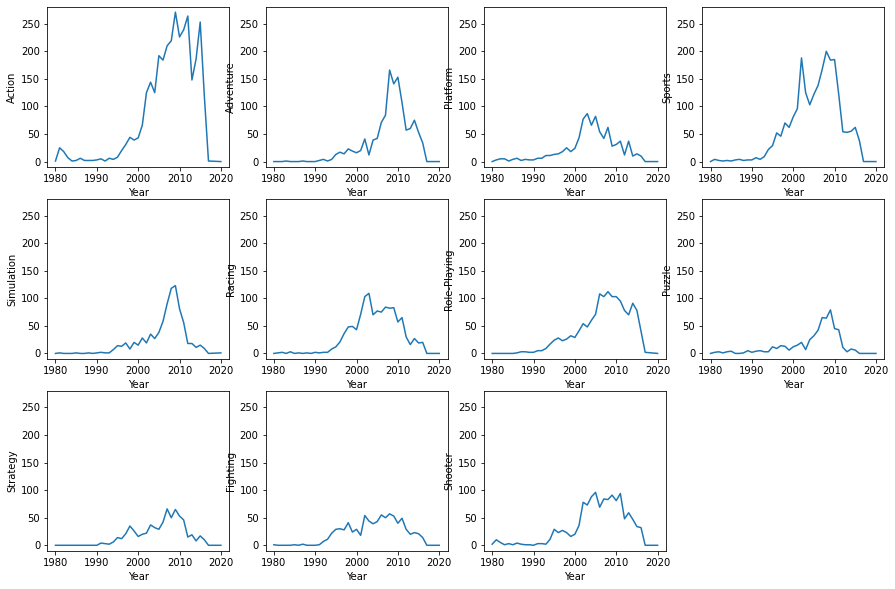

In [13]:
import seaborn as sns
fig = plt.figure(figsize=(15, 10))

areas = []
for i in range(1, 12):
    globals()['area{}'.format(i)] = fig.add_subplot(3, 4, i)
    plt.ylim(-10, 280)
    areas.append('area{}'.format(i))

sns.lineplot(data=df_Trend2['Action'], ax=area1)
sns.lineplot(data=df_Trend2['Adventure'], ax=area2)
sns.lineplot(data=df_Trend2['Platform'], ax=area3)
sns.lineplot(data=df_Trend2['Sports'], ax=area4)
sns.lineplot(data=df_Trend2['Simulation'], ax=area5)
sns.lineplot(data=df_Trend2['Racing'], ax=area6)
sns.lineplot(data=df_Trend2['Role-Playing'], ax=area7)
sns.lineplot(data=df_Trend2['Puzzle'], ax=area8)
sns.lineplot(data=df_Trend2['Strategy'], ax=area9)
sns.lineplot(data=df_Trend2['Fighting'], ax=area10)
sns.lineplot(data=df_Trend2['Shooter'], ax=area11)

In [53]:
df_Trend3 = df_Trend2.drop([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 2016, 2017, 2020], axis=0)
for i in Genres:
  print(i, round(np.corrcoef(df_Trend3.index, df_Trend3[i])[0, 1], 3))

Action 0.89
Adventure 0.636
Platform -0.008
Sports 0.249
Simulation 0.324
Racing -0.016
Role-Playing 0.807
Puzzle 0.264
Strategy 0.222
Fighting 0.057
Shooter 0.486


In [15]:
def YearTotal (Year, df):
  tempdf = df[df['Year'] == Year].reset_index(drop = True)
  tempdf2 = pd.DataFrame(columns = [Year])

  for i in Genres:
    temp = tempdf[tempdf['Genre'] == i].reset_index(drop = True)
    tempdf2.loc[i] = temp['Total_Sales'].sum(axis = 0)
  return tempdf2

Years = []
for i in df_Trend['Year']:
  if i not in Years:
    Years.append(i)
Years.sort()

df_Trend2_Year = pd.DataFrame(index = Genres)
for i in Years:
  df_Trend2_Year = pd.concat([df_Trend2_Year, YearTotal(i, df_Trend)], axis = 1)
df_Trend2_Year = df_Trend2_Year.T

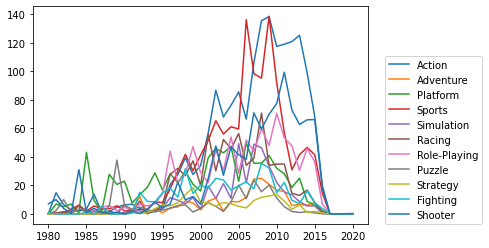

In [16]:
(df_Trend2_Year.plot().legend(loc=(1.05, 0)));

In [54]:
df_Trend4 = df_Trend2_Year.drop([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 2016, 2017, 2020], axis=0)
for i in Genres:
  print(i, round(np.corrcoef(df_Trend4.index, df_Trend4[i])[0, 1], 3))

Action 0.826
Adventure 0.393
Platform -0.159
Sports 0.375
Simulation 0.191
Racing -0.125
Role-Playing 0.492
Puzzle 0.084
Strategy -0.31
Fighting -0.188
Shooter 0.889


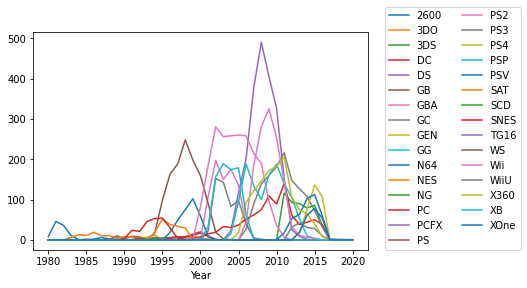

In [18]:
# 연도별 플랫폼에 따른 트렌드
df_Trend = df_Trend[df_Trend['Genre'].notnull()].reset_index(drop = True)

df_Trend3 = pd.crosstab(df_Trend.Year, df_Trend.Platform)
(df_Trend3.plot().legend(loc=(1.05, 0), ncol=2));

In [34]:
# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
df_Game = pd.concat([df[['Name', 'Platform', 'Year', 'Genre', 'Publisher']], df_sales3], axis = 1)
df_Game = df_Game.sort_values(by=['Total_Sales'], ascending=False)
df_Game = df_Game.iloc[:100]
df_Game['Year'] = df_Game['Year'].apply(cleaning)

df_Game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2909,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4200,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12580,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3353,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7830,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
1099,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.57
7495,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
12851,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.44
10938,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.79,1.90,0.00,0.69,7.38


[Text(0, 0, 'Sports'),
 Text(0, 0, 'Platform'),
 Text(0, 0, 'Racing'),
 Text(0, 0, 'Role-Playing'),
 Text(0, 0, 'Puzzle'),
 Text(0, 0, 'Misc'),
 Text(0, 0, 'Shooter'),
 Text(0, 0, 'Simulation'),
 Text(0, 0, 'Action'),
 Text(0, 0, 'Fighting'),
 Text(0, 0, 'Adventure')]

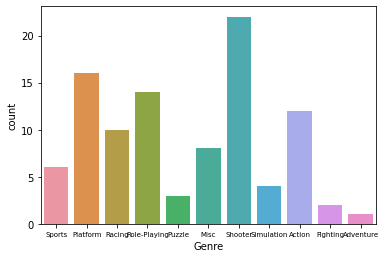

In [47]:
ax = sns.countplot(data=df_Game, x='Genre')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)

In [90]:
df_Game_Shooter = df_Game[df_Game['Genre'] == 'Shooter']
df_Game_Shooter = df_Game_Shooter.sort_values(by=['Year'], ascending=False)
df_Game_Shooter

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
9071,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
3025,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
7143,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,2.80,3.30,0.14,1.37,7.61
5605,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,6.72,2.63,0.04,0.82,10.21
6882,Call of Duty: Ghosts,PS3,2013.0,Shooter,Activision,4.09,3.73,0.38,1.38,9.58
4241,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
6394,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.74
14577,Halo 4,X360,2012.0,Shooter,Microsoft Game Studios,6.63,2.36,0.04,0.73,9.76
2810,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
8011,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34


In [59]:
df_Game_Shooter_CoD = df_Game_Shooter[df_Game_Shooter['Name'].str.contains('Call')]
print(df_Game_Shooter['Total_Sales'].sum(), df_Game_Shooter_CoD['Total_Sales'].sum())

257.5899999999999 165.93


In [60]:
df_Game_Shooter_Halo = df_Game_Shooter[df_Game_Shooter['Name'].str.contains('Halo')]
print(df_Game_Shooter['Total_Sales'].sum(), df_Game_Shooter_Halo['Total_Sales'].sum())

257.5899999999999 40.25


In [91]:
df_Game_Platform = df_Game[df_Game['Genre'] == 'Platform']
df_Game_Platform = df_Game_Platform.sort_values(by=['Year'], ascending=False)
df_Game_Platform

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
10380,New Super Mario Bros. 2,3DS,2012.0,Platform,Nintendo,3.66,3.07,2.47,0.63,9.83
12624,Super Mario 3D Land,3DS,2011.0,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79
16516,Super Mario Galaxy 2,Wii,2010.0,Platform,Nintendo,3.66,2.42,0.98,0.64,7.70
16532,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
12406,Super Mario Galaxy,Wii,2007.0,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52
6938,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
12473,Super Mario 64,DS,2004.0,Platform,Nintendo,5.08,3.11,1.25,0.98,10.42
1099,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.57
6459,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91,2.85,1.91,0.23,11.90
7129,Donkey Kong Country,SNES,1994.0,Platform,Nintendo,4.36,1.71,3.00,0.23,9.30


In [67]:
df_Game_Platform_Mario = df_Game_Platform[df_Game_Platform['Name'].str.contains('Mario')]
print(df_Game_Platform['Total_Sales'].sum(), df_Game_Platform_Mario['Total_Sales'].sum())

251.94 235.07


In [92]:
df_Game_RolePlaying = df_Game[df_Game['Genre'] == 'Role-Playing']
df_Game_RolePlaying = df_Game_RolePlaying.sort_values(by=['Year'], ascending=False)
df_Game_RolePlaying

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
4252,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
15679,Pokemon Black 2/Pokemon White 2,DS,2012.0,Role-Playing,Nintendo,2.91,1.86,3.14,0.43,8.34
11520,The Elder Scrolls V: Skyrim,X360,2011.0,Role-Playing,Bethesda Softworks,5.03,2.86,0.10,0.85,8.84
10622,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
7632,Pokémon Platinum Version,DS,2008.0,Role-Playing,Nintendo,2.82,1.78,2.69,0.55,7.84
10556,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35
1811,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49
10918,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.84
1873,Final Fantasy X,PS2,2001.0,Role-Playing,Sony Computer Entertainment,2.91,2.07,2.73,0.33,8.04
9417,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09


In [70]:
df_Game_RolePlaying_Pkm = df_Game_RolePlaying[df_Game_RolePlaying['Name'].str.contains('mon')]
print(df_Game_RolePlaying['Total_Sales'].sum(), df_Game_RolePlaying_Pkm['Total_Sales'].sum(),
      df_Game_RolePlaying_Pkm['Total_Sales'].sum() / df_Game_RolePlaying['Total_Sales'].sum() * 100)

191.08 156.62 81.9656688298095


In [72]:
df_Game_RolePlaying_FF = df_Game_RolePlaying[df_Game_RolePlaying['Name'].str.contains('Final')]
print(df_Game_RolePlaying['Total_Sales'].sum(), df_Game_RolePlaying_FF['Total_Sales'].sum(),
      df_Game_RolePlaying_FF['Total_Sales'].sum() / df_Game_RolePlaying['Total_Sales'].sum() * 100)

191.08 25.619999999999997 13.407996650617541


In [93]:
df_Game_Action = df_Game[df_Game['Genre'] == 'Action']
df_Game_Action = df_Game_Action.sort_values(by=['Year'], ascending=False)
df_Game_Action

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2009,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
3484,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
10914,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
9036,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.25
4807,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
13927,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.03
16476,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.58
762,Grand Theft Auto: Liberty City Stories,PSP,2005.0,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72
14670,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
5341,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15


In [75]:
df_Game_Action_GTA = df_Game_Action[df_Game_Action['Name'].str.contains('Grand')]
print(df_Game_Action['Total_Sales'].sum(), df_Game_Action_GTA['Total_Sales'].sum(),
      df_Game_Action_GTA['Total_Sales'].sum() / df_Game_Action['Total_Sales'].sum() * 100)

156.89999999999998 129.15 823.1357552581263


[Text(0, 0, 'Wii'),
 Text(0, 0, 'NES'),
 Text(0, 0, 'GB'),
 Text(0, 0, 'DS'),
 Text(0, 0, 'X360'),
 Text(0, 0, 'PS3'),
 Text(0, 0, 'PS2'),
 Text(0, 0, 'SNES'),
 Text(0, 0, 'GBA'),
 Text(0, 0, '3DS'),
 Text(0, 0, 'PS4'),
 Text(0, 0, 'N64'),
 Text(0, 0, 'PS'),
 Text(0, 0, 'XB'),
 Text(0, 0, 'PC'),
 Text(0, 0, '2600'),
 Text(0, 0, 'PSP'),
 Text(0, 0, 'XOne'),
 Text(0, 0, 'GC'),
 Text(0, 0, 'WiiU'),
 Text(0, 0, 'GEN'),
 Text(0, 0, 'DC'),
 Text(0, 0, 'PSV'),
 Text(0, 0, 'SAT')]

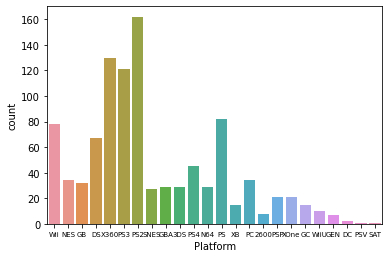

In [85]:
df_Game2 = pd.concat([df[['Name', 'Platform', 'Year', 'Genre', 'Publisher']], df_sales3], axis = 1)
df_Game2 = df_Game2.sort_values(by=['Total_Sales'], ascending=False)
df_Game2 = df_Game2.iloc[:1000]
df_Game2['Year'] = df_Game2['Year'].apply(cleaning)

ax = sns.countplot(data=df_Game2, x='Platform')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)

[Text(0, 0, 'PS4'),
 Text(0, 0, 'XOne'),
 Text(0, 0, '3DS'),
 Text(0, 0, 'WiiU'),
 Text(0, 0, 'PS3'),
 Text(0, 0, 'X360'),
 Text(0, 0, 'PSV'),
 Text(0, 0, 'PC'),
 Text(0, 0, 'Wii'),
 Text(0, 0, 'DS'),
 Text(0, 0, 'PSP'),
 Text(0, 0, 'PS2'),
 Text(0, 0, 'GBA')]

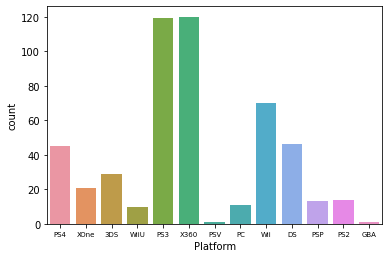

In [89]:
df_Game2 = df_Game2.sort_values(by=['Year'], ascending=False)
df_Game2 = df_Game2.iloc[:500]

ax = sns.countplot(data=df_Game2, x='Platform')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)